**Isaac Anthony Huamani Sulca - 20215421**

# 1. Diseño de filtros digitales

In [1]:
#Importacion de librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pandas as pd

# Configuración para mejores gráficos
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

Parte 1)


In [11]:
# Parámetros del sistema
fs_original = 100e6  # Frecuencia de muestreo original: 100 MHz
fs_final = 1e6       # Frecuencia de muestreo final: 1 MHz
fc = 500e3           # Frecuencia de corte: 500 kHz
As = 80              # Atenuación en banda de rechazo: 80 dB

# Factor de decimación
M = int(fs_original / fs_final)

print(f"Frecuencia de muestreo original: {fs_original/1e6} MHz")
print(f"Frecuencia de muestreo final: {fs_final/1e6} MHz")
print(f"Factor de decimación: {M}")
print(f"Frecuencia de corte: {fc/1e3} kHz")
print(f"Atenuación deseada: {As} dB")

Frecuencia de muestreo original: 100.0 MHz
Frecuencia de muestreo final: 1.0 MHz
Factor de decimación: 100
Frecuencia de corte: 500.0 kHz
Atenuación deseada: 80 dB


In [14]:
#Parametros de la ventana Kaiser
# Banda de transición máxima (10% de fs_final)
delta_f_max = 0.10 * fs_final  # 100 kHz
print(f"Ancho de banda de transición máximo: {delta_f_max/1e3} kHz")

# Frecuencias normalizadas respecto a fs_original
fp = fc / fs_original           # Frecuencia de paso normalizada
fs_corte = (fc + delta_f_max) / fs_original  # Frecuencia de rechazo normalizada
delta_f_norm = delta_f_max / fs_original

print(f"\nFrecuencia de paso normalizada: {fp}")
print(f"Frecuencia de rechazo normalizada: {fs_corte}")
print(f"Ancho de transición normalizado: {delta_f_norm}")

# Parámetro beta de Kaiser según la atenuación deseada
if As > 50:
    beta = 0.1102 * (As - 8.7)
elif As >= 21:
    beta = 0.5842 * (As - 21)**0.4 + 0.07886 * (As - 21)
else:
    beta = 0.0

print(f"\nParámetro beta de Kaiser: {beta:.4f}")

# Longitud del filtro según la banda de transición
N = int(np.ceil((As - 8) / (2.285 * 2 * np.pi * delta_f_norm)))

# Asegurar que N es impar para tener simetría
if N % 2 == 0:
    N += 1

print(f"Orden del filtro (N-1): {N-1}")
print(f"Longitud del filtro (N): {N}")

Ancho de banda de transición máximo: 100.0 kHz

Frecuencia de paso normalizada: 0.005
Frecuencia de rechazo normalizada: 0.006
Ancho de transición normalizado: 0.001

Parámetro beta de Kaiser: 7.8573
Orden del filtro (N-1): 5014
Longitud del filtro (N): 5015


In [15]:
#Diseño del filtro ventana de Kaiser
# Frecuencia de corte normalizada (entre 0 y 1, donde 1 es Nyquist)
wc = fc / (fs_original / 2)

# Diseño del filtro FIR usando ventana de Kaiser
h = signal.firwin(N, wc, window=('kaiser', beta), scale=True)

print(f"Número de coeficientes del filtro: {len(h)}")
print(f"Primeros 10 coeficientes:")
print(h[:10])

Número de coeficientes del filtro: 5015
Primeros 10 coeficientes:
[-7.40228354e-08 -6.43951957e-08 -5.44412947e-08 -4.41669297e-08
 -3.35784470e-08 -2.26827425e-08 -1.14872619e-08 -1.81806723e-22
  1.17705011e-08  2.38151537e-08]


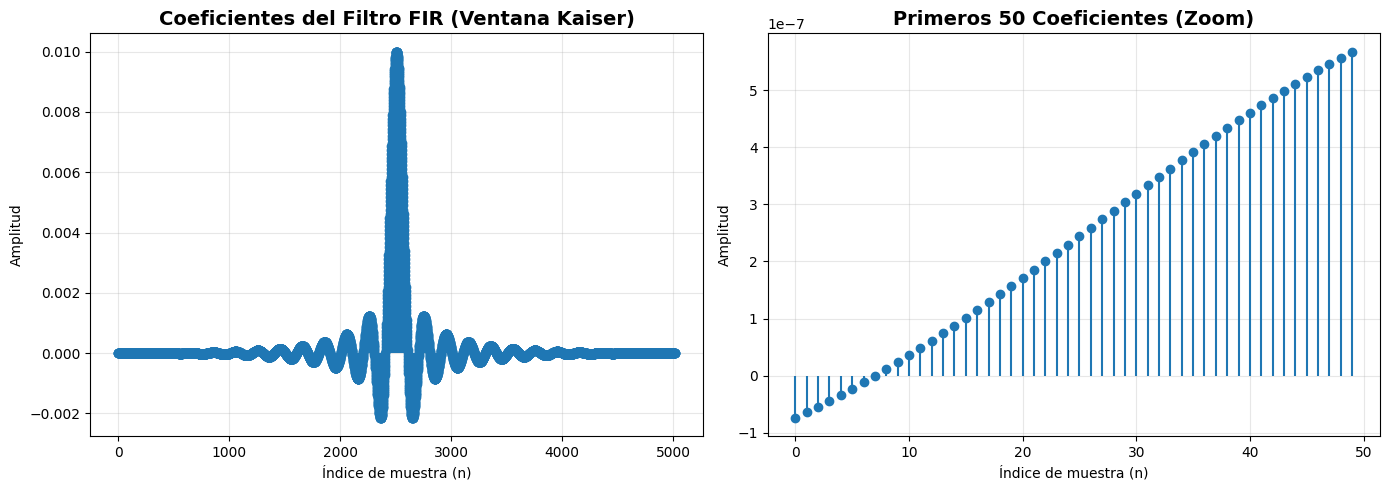

In [16]:
#Grafica de coeficientes del filtro
plt.figure(figsize=(14, 5))

# Gráfico de coeficientes
plt.subplot(1, 2, 1)
plt.stem(range(N), h, basefmt=' ')
plt.title('Coeficientes del Filtro FIR (Ventana Kaiser)', fontsize=14, fontweight='bold')
plt. xlabel('Índice de muestra (n)')
plt.ylabel('Amplitud')
plt.grid(True, alpha=0.3)

# Zoom a los primeros coeficientes
plt.subplot(1, 2, 2)
n_zoom = min(50, N)
plt.stem(range(n_zoom), h[:n_zoom], basefmt=' ')
plt.title(f'Primeros {n_zoom} Coeficientes (Zoom)', fontsize=14, fontweight='bold')
plt.xlabel('Índice de muestra (n)')
plt.ylabel('Amplitud')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [19]:
#Calculo de la respuesta en frecuencia
w, H = signal.freqz(h, worN=8192, fs=fs_original)

# Magnitud en dB
H_dB = 20 * np. log10(np.abs(H) + 1e-12)  # Evitar log(0)

# Fase en grados
H_phase = np.angle(H) * 180 / np.pi

# Desenvuelto de fase
H_phase_unwrap = np.unwrap(np.angle(H)) * 180 / np.pi

print("Respuesta en frecuencia calculada")
print(f"Número de puntos en frecuencia: {len(w)}")

Respuesta en frecuencia calculada
Número de puntos en frecuencia: 8192


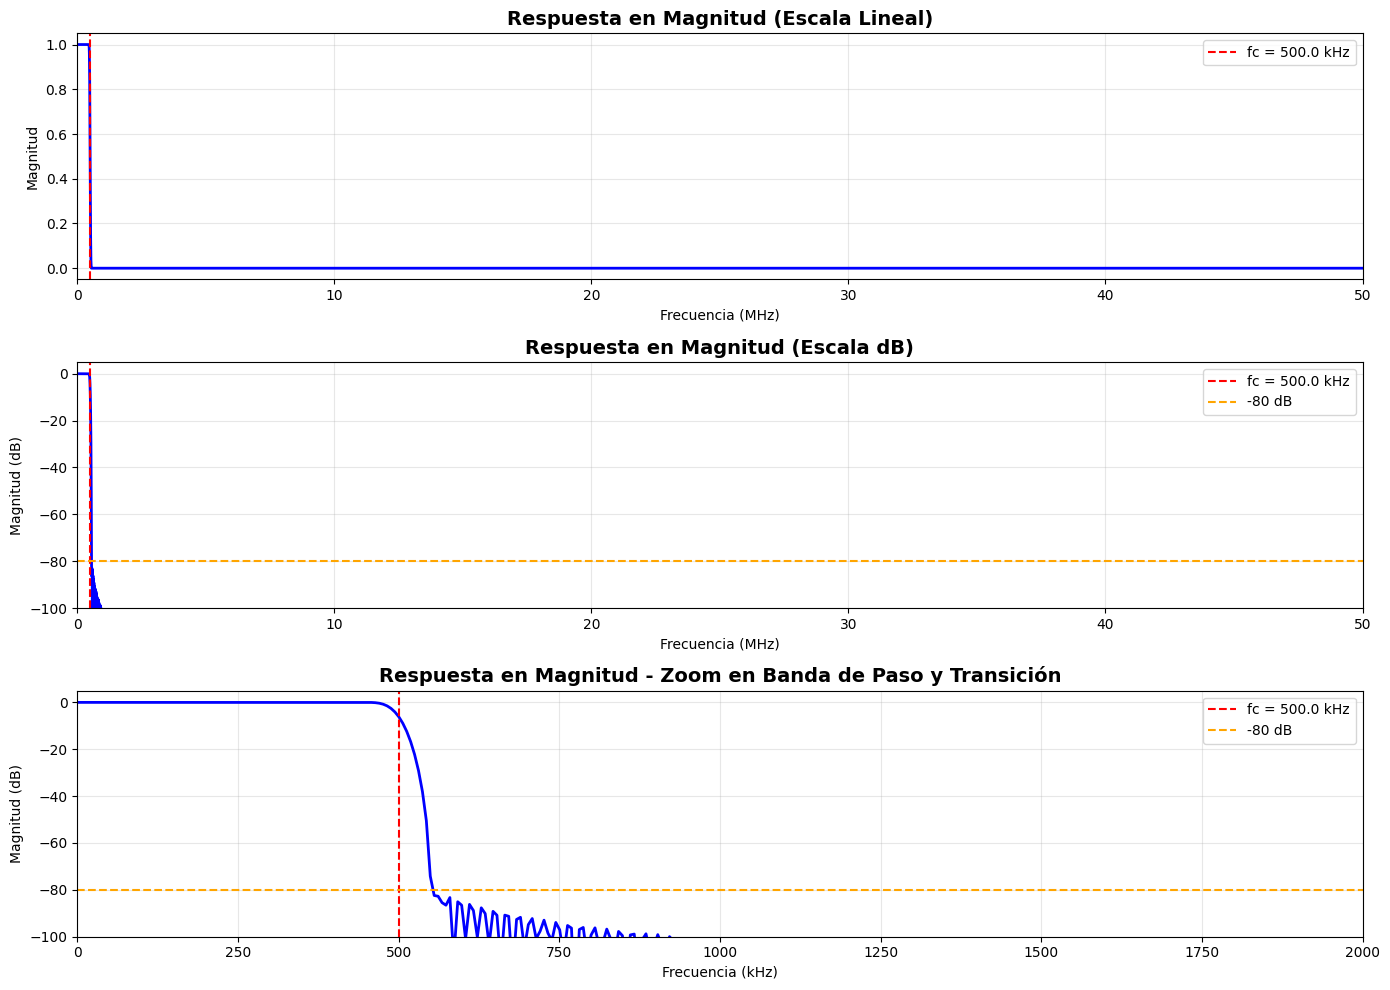

In [20]:
#Grafico de respuesta en frecuencia (Magnitud)
plt.figure(figsize=(14, 10))

# Magnitud en escala lineal
plt.subplot(3, 1, 1)
plt.plot(w/1e6, np.abs(H), 'b', linewidth=2)
plt. title('Respuesta en Magnitud (Escala Lineal)', fontsize=14, fontweight='bold')
plt.xlabel('Frecuencia (MHz)')
plt.ylabel('Magnitud')
plt.grid(True, alpha=0.3)
plt.xlim([0, fs_original/2/1e6])
plt.axvline(fc/1e6, color='r', linestyle='--', label=f'fc = {fc/1e3} kHz')
plt.legend()

# Magnitud en dB (vista completa)
plt.subplot(3, 1, 2)
plt.plot(w/1e6, H_dB, 'b', linewidth=2)
plt. title('Respuesta en Magnitud (Escala dB)', fontsize=14, fontweight='bold')
plt.xlabel('Frecuencia (MHz)')
plt.ylabel('Magnitud (dB)')
plt.grid(True, alpha=0.3)
plt.xlim([0, fs_original/2/1e6])
plt.ylim([-100, 5])
plt.axvline(fc/1e6, color='r', linestyle='--', label=f'fc = {fc/1e3} kHz')
plt.axhline(-As, color='orange', linestyle='--', label=f'-{As} dB')
plt. legend()

# Magnitud en dB (zoom en banda de paso y transición)
plt.subplot(3, 1, 3)
plt.plot(w/1e3, H_dB, 'b', linewidth=2)
plt. title('Respuesta en Magnitud - Zoom en Banda de Paso y Transición', fontsize=14, fontweight='bold')
plt.xlabel('Frecuencia (kHz)')
plt.ylabel('Magnitud (dB)')
plt.grid(True, alpha=0.3)
plt. xlim([0, 2000])  # Hasta 2 MHz para ver bien la transición
plt.ylim([-100, 5])
plt.axvline(fc/1e3, color='r', linestyle='--', label=f'fc = {fc/1e3} kHz')
plt.axhline(-As, color='orange', linestyle='--', label=f'-{As} dB')
plt.legend()

plt. tight_layout()
plt.show()

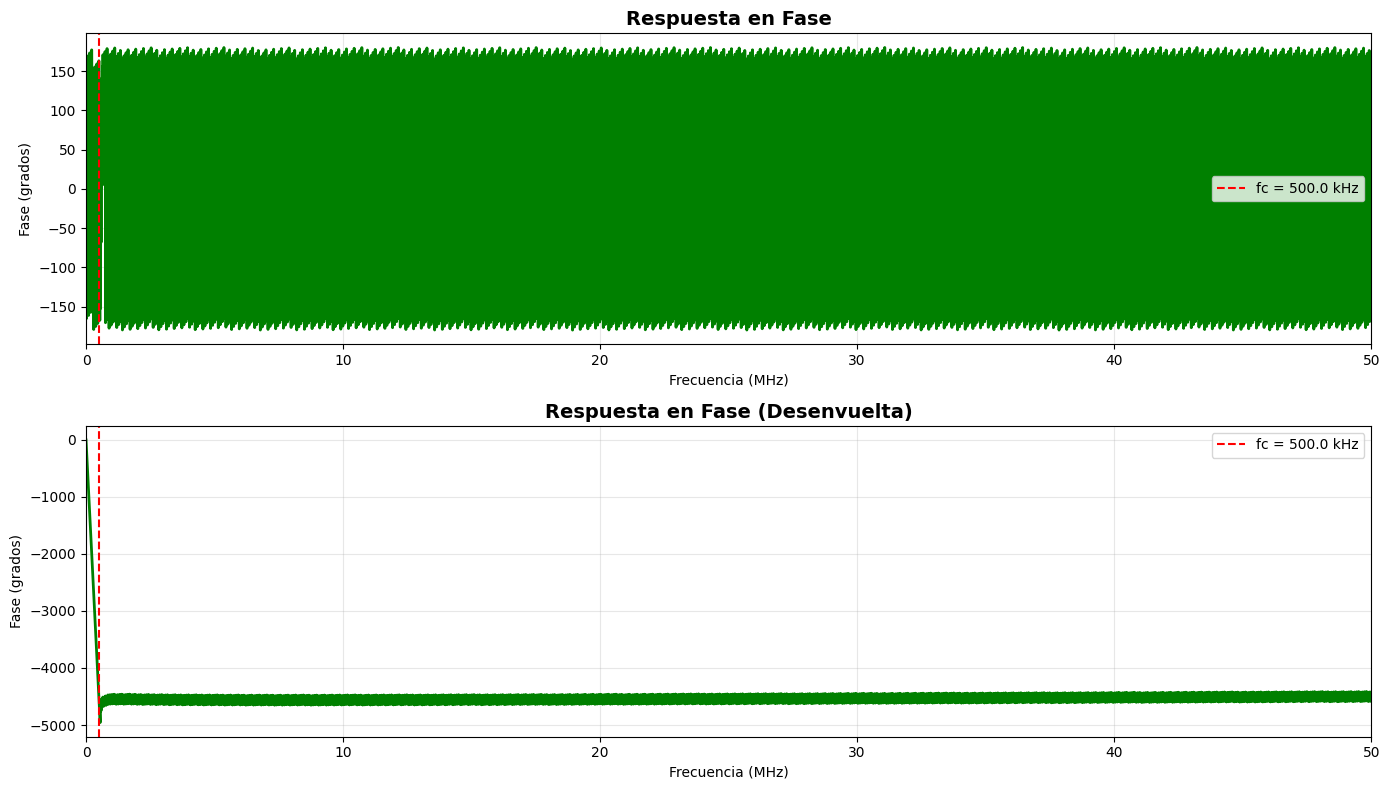

In [21]:
#Grafico de respuesta en frecuencia (fase)
plt. figure(figsize=(14, 8))

# Fase
plt.subplot(2, 1, 1)
plt.plot(w/1e6, H_phase, 'g', linewidth=2)
plt.title('Respuesta en Fase', fontsize=14, fontweight='bold')
plt.xlabel('Frecuencia (MHz)')
plt.ylabel('Fase (grados)')
plt.grid(True, alpha=0.3)
plt.xlim([0, fs_original/2/1e6])
plt.axvline(fc/1e6, color='r', linestyle='--', label=f'fc = {fc/1e3} kHz')
plt.legend()

# Fase desenvuelta
plt.subplot(2, 1, 2)
plt.plot(w/1e6, H_phase_unwrap, 'g', linewidth=2)
plt.title('Respuesta en Fase (Desenvuelta)', fontsize=14, fontweight='bold')
plt.xlabel('Frecuencia (MHz)')
plt.ylabel('Fase (grados)')
plt.grid(True, alpha=0.3)
plt.xlim([0, fs_original/2/1e6])
plt. axvline(fc/1e6, color='r', linestyle='--', label=f'fc = {fc/1e3} kHz')
plt.legend()

plt.tight_layout()
plt.show()

In [24]:
#Parametros del filtro diseñado
# Encontrar índices de frecuencias importantes
idx_fc = np.argmin(np.abs(w - fc))
idx_passband = np.where(w <= fc * 0.9)[0]  # Banda de paso hasta 90% de fc
idx_stopband = np.where(w >= fc * 1.5)[0]  # Banda de rechazo desde 150% de fc

# Rizado en banda de paso (passband ripple)
H_passband = H_dB[idx_passband]
ripple_passband = np.max(H_passband) - np.min(H_passband)

# Rizado en banda de rechazo (stopband ripple)
H_stopband_linear = np.abs(H[idx_stopband])
ripple_stopband = np.max(H_stopband_linear) - np.min(H_stopband_linear)

# Atenuación en banda de rechazo
attenuation_stopband = -np.max(H_dB[idx_stopband])

# Encontrar ancho de banda de transición (entre -3dB y -As dB)
idx_3dB = np.argmin(np.abs(H_dB - (-3)))
idx_stopband_start = np.argmin(np.abs(H_dB - (-As)))

f_3dB = w[idx_3dB]
f_stopband = w[idx_stopband_start]
transition_bandwidth = f_stopband - f_3dB

print(f"Frecuencia a -3 dB: {f_3dB/1e3:.2f} kHz")
print(f"Frecuencia a -{As} dB: {f_stopband/1e3:.2f} kHz")
print(f"Ancho de banda de transición: {transition_bandwidth/1e3:.2f} kHz")
print(f"Rizado en banda de paso: {ripple_passband:.4f} dB")
print(f"Rizado en banda de rechazo: {ripple_stopband:.6e}")
print(f"Atenuación en banda de rechazo: {attenuation_stopband:.2f} dB")

Frecuencia a -3 dB: 488.28 kHz
Frecuencia a -80 dB: 555.42 kHz
Ancho de banda de transición: 67.14 kHz
Rizado en banda de paso: 0.0014 dB
Rizado en banda de rechazo: 1.737273e-05
Atenuación en banda de rechazo: 95.20 dB


In [25]:
# Crear tabla resumen
parametros = {
    'Parámetro': [
        'Orden del filtro (N-1)',
        'Longitud del filtro (N)',
        'Parámetro beta de Kaiser',
        'Frecuencia de corte',
        'Frecuencia a -3 dB',
        'Ancho de banda de transición',
        'Transición (% de fs_final)',
        'Rizado en banda de paso',
        'Rizado en banda de rechazo',
        'Atenuación en banda de rechazo',
        'Atenuación objetivo'
    ],
    'Valor': [
        f'{N-1}',
        f'{N}',
        f'{beta:.4f}',
        f'{fc/1e3:.2f} kHz',
        f'{f_3dB/1e3:.2f} kHz',
        f'{transition_bandwidth/1e3:.2f} kHz',
        f'{(transition_bandwidth/fs_final)*100:.2f} %',
        f'{ripple_passband:.4f} dB',
        f'{ripple_stopband:.6e}',
        f'{attenuation_stopband:.2f} dB',
        f'{As} dB'
    ],
    'Especificación': [
        '-',
        '-',
        f'Calculado para As = {As} dB',
        f'{fc/1e3} kHz',
        '-',
        f'≤ {delta_f_max/1e3} kHz',
        '≤ 10 %',
        '-',
        '-',
        f'≥ {As} dB',
        f'{As} dB'
    ]
}

df_parametros = pd.DataFrame(parametros)

print("\n" + "="*80)
print("RESUMEN DE PARÁMETROS DEL FILTRO PASABAJOS")
print("="*80)
print(df_parametros.to_string(index=False))
print("="*80)

# Verificar cumplimiento de especificaciones
print("\nVERIFICACIÓN DE ESPECIFICACIONES:")
print(f"✓ Atenuación en banda de rechazo: {attenuation_stopband:.2f} dB {'≥' if attenuation_stopband >= As else '<'} {As} dB - {'CUMPLE' if attenuation_stopband >= As else 'NO CUMPLE'}")
print(f"✓ Ancho de transición: {transition_bandwidth/1e3:.2f} kHz {'≤' if transition_bandwidth <= delta_f_max else '>'} {delta_f_max/1e3} kHz - {'CUMPLE' if transition_bandwidth <= delta_f_max else 'NO CUMPLE'}")
print(f"✓ Porcentaje de transición: {(transition_bandwidth/fs_final)*100:.2f}% {'≤' if (transition_bandwidth/fs_final)*100 <= 10 else '>'} 10% - {'CUMPLE' if (transition_bandwidth/fs_final)*100 <= 10 else 'NO CUMPLE'}")


RESUMEN DE PARÁMETROS DEL FILTRO PASABAJOS
                     Parámetro        Valor            Especificación
        Orden del filtro (N-1)         5014                         -
       Longitud del filtro (N)         5015                         -
      Parámetro beta de Kaiser       7.8573 Calculado para As = 80 dB
           Frecuencia de corte   500.00 kHz                 500.0 kHz
            Frecuencia a -3 dB   488.28 kHz                         -
  Ancho de banda de transición    67.14 kHz               ≤ 100.0 kHz
    Transición (% de fs_final)       6.71 %                    ≤ 10 %
       Rizado en banda de paso    0.0014 dB                         -
    Rizado en banda de rechazo 1.737273e-05                         -
Atenuación en banda de rechazo     95.20 dB                   ≥ 80 dB
           Atenuación objetivo        80 dB                     80 dB

VERIFICACIÓN DE ESPECIFICACIONES:
✓ Atenuación en banda de rechazo: 95.20 dB ≥ 80 dB - CUMPLE
✓ Ancho de transición

AttributeError: module 'scipy.signal' has no attribute 'kaiser'

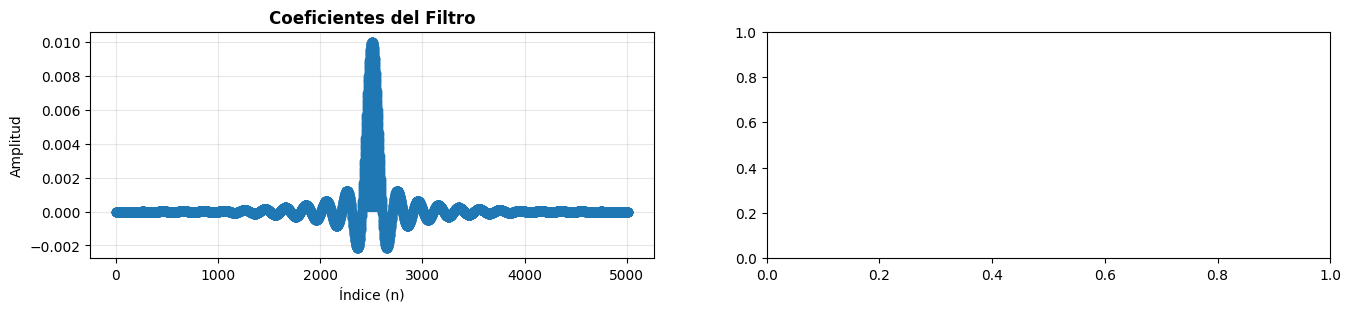

In [26]:
fig = plt.figure(figsize=(16, 10))

# Coeficientes del filtro
ax1 = plt.subplot(3, 2, 1)
plt.stem(range(N), h, basefmt=' ')
plt.title('Coeficientes del Filtro', fontsize=12, fontweight='bold')
plt.xlabel('Índice (n)')
plt.ylabel('Amplitud')
plt.grid(True, alpha=0.3)

# Ventana de Kaiser
ax2 = plt. subplot(3, 2, 2)
ventana = signal.kaiser(N, beta)
plt. plot(ventana, 'r', linewidth=2)
plt. title(f'Ventana de Kaiser (β={beta:. 2f})', fontsize=12, fontweight='bold')
plt. xlabel('Índice (n)')
plt.ylabel('Amplitud')
plt.grid(True, alpha=0.3)

# Magnitud en dB - vista completa
ax3 = plt.subplot(3, 2, 3)
plt.plot(w/1e6, H_dB, 'b', linewidth=2)
plt.title('Respuesta en Magnitud (dB) - Vista Completa', fontsize=12, fontweight='bold')
plt.xlabel('Frecuencia (MHz)')
plt.ylabel('Magnitud (dB)')
plt.grid(True, alpha=0.3)
plt.xlim([0, fs_original/2/1e6])
plt.ylim([-100, 5])
plt. axvline(fc/1e6, color='r', linestyle='--', alpha=0.7)
plt.axhline(-As, color='orange', linestyle='--', alpha=0.7)

# Magnitud en dB - zoom
ax4 = plt.subplot(3, 2, 4)
plt.plot(w/1e3, H_dB, 'b', linewidth=2)
plt.title('Respuesta en Magnitud (dB) - Zoom', fontsize=12, fontweight='bold')
plt.xlabel('Frecuencia (kHz)')
plt.ylabel('Magnitud (dB)')
plt.grid(True, alpha=0.3)
plt. xlim([0, 1500])
plt.ylim([-100, 5])
plt. axvline(fc/1e3, color='r', linestyle='--', alpha=0.7, label=f'fc={fc/1e3}kHz')
plt.axhline(-3, color='g', linestyle='--', alpha=0.7, label='-3dB')
plt.axhline(-As, color='orange', linestyle='--', alpha=0.7, label=f'-{As}dB')
plt.legend()

# Fase desenvuelta
ax5 = plt.subplot(3, 2, 5)
plt.plot(w/1e6, H_phase_unwrap, 'g', linewidth=2)
plt.title('Respuesta en Fase (Desenvuelta)', fontsize=12, fontweight='bold')
plt.xlabel('Frecuencia (MHz)')
plt.ylabel('Fase (grados)')
plt.grid(True, alpha=0.3)
plt.xlim([0, fs_original/2/1e6])

# Retardo de grupo
ax6 = plt.subplot(3, 2, 6)
w_gd, gd = signal.group_delay((h, 1), fs=fs_original)
plt.plot(w_gd/1e6, gd, 'm', linewidth=2)
plt.title('Retardo de Grupo', fontsize=12, fontweight='bold')
plt.xlabel('Frecuencia (MHz)')
plt.ylabel('Retardo (muestras)')
plt.grid(True, alpha=0.3)
plt.xlim([0, fs_original/2/1e6])

plt.tight_layout()
plt.show()

Parte 2)

Parte 3)

# 2. Cancelador de ruido

# 3. Prediccion lineal en el mercado de valores